In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

from IPython.display import display, Latex

%matplotlib inline
%config InlineBackend.figure_format='retina'
#!pip install git+https://github.com/M-Bianchi/My_matplotlib_style
plt.style.use('mystyle')

### Time to get your hands dirty. Galaxy vs quasars

We're now going to classify galaxy vs quasars in the Sloan Digital Sky Survey. 

This is one of the most famous example of machine-learning classification in astronomy. For some recent work see e.g. 
- *Identifying galaxies, quasars, and stars with machine learning: A new catalogue of classifications for 111 million SDSS sources without spectra* Clarke et al (2019) [arXiv:1909.10963](https://arxiv.org/abs/1909.10963)
- *Quasar and galaxy classification in Gaia Data Release 2* Bailer-Jones et al (2019) [arXiv:1910.05255](https://arxiv.org/abs/1910.05255)

Some figures from the second paper:


SDSS observed in four bands:
    
![](https://speclite.readthedocs.io/en/latest/_images/sdss2010.png) 
    

#### Data

The dataset is at `solutions/galaxyquasar.csv`. I have extracted it myself from the SDSS database using the SQL query reported [here](https://www.astroml.org/_modules/astroML/datasets/sdss_galaxy_colors.html#fetch_sdss_galaxy_colors)

(If you've never used [SQL](https://en.wikipedia.org/wiki/SQL) and want to learn something new it's computing, it's very powerful)

#### Tasks

- Create arrays for the $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create an array with the class labels where galaxy=$0$ and quasar=$1$. 
- Classify the dataset against the target label.
- Try some of the classification methods we've seen so far and evaluate the performance using the ROC curve.
- Remember to split the dataset into training and validation...

#### Ideas
- Try using different colors (a subset of them first, than all together). Which is the most important feature?
- What are the colors that better satisfy or invalidate the "Naive" assumption of independence between the attributes?


# Code

## 1) Extracting the data

Extract the fluxes

In [2]:
data = np.genfromtxt('../solutions/galaxyquasar.csv', delimiter=',', names=True, usecols=(0,1,2,3,4,6), dtype=float)
names = data.dtype.names
names

('u', 'g', 'r', 'i', 'z', 'z1')

In [3]:
data = np.genfromtxt('../solutions/galaxyquasar.csv', delimiter=',', skip_header=1, usecols=(0,1,2,3,4,6), dtype=float)
data = dict(zip(names, data.T))
data

{'u': array([18.97213, 19.24592, 19.43536, ..., 18.62718, 19.5514 , 18.80772]),
 'g': array([18.53676, 17.47646, 17.70268, ..., 17.30876, 18.27711, 17.75751]),
 'r': array([18.5828 , 16.47817, 16.91565, ..., 16.87371, 17.62101, 17.405  ]),
 'i': array([18.34936, 16.04472, 16.58327, ..., 16.62399, 17.21947, 17.2165 ]),
 'z': array([18.29215, 15.68851, 16.39128, ..., 16.42296, 17.03347, 17.12295]),
 'z1': array([0.5228189 , 0.1228459 , 0.        , ..., 0.05442934, 0.1125709 ,
        0.04365238])}

Extract the labels

In [4]:
from sklearn.preprocessing import LabelEncoder

labels = np.genfromtxt('../solutions/galaxyquasar.csv', delimiter=',', skip_header=1, usecols=5, dtype=str)
print(f'labels: {labels}')
print(f'{np.sum(labels=="GALAXY")} galaxies')
print(f'{np.sum(labels=="QSO")} quasars')

le = LabelEncoder()
labels = le.fit_transform(labels)
class_names = le.classes_
print(f'\nencoded labels: {labels}')
print(f'class names:{class_names}')

labels: ['QSO' 'GALAXY' 'GALAXY' ... 'GALAXY' 'GALAXY' 'GALAXY']
42866 galaxies
7134 quasars

encoded labels: [1 0 0 ... 0 0 0]
class names:['GALAXY' 'QSO']


Create an array of the $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors

In [6]:
data['ug'] = data['u'] - data['g'] 
data['gr'] = data['g'] - data['r'] 
data['ri'] = data['r'] - data['i'] 
data['iz'] = data['i'] - data['z'] 
data['labels'] = labels
data.keys()

dict_keys(['u', 'g', 'r', 'i', 'z', 'z1', 'ug', 'gr', 'ri', 'iz', 'labels'])

## 2) Exploring the data

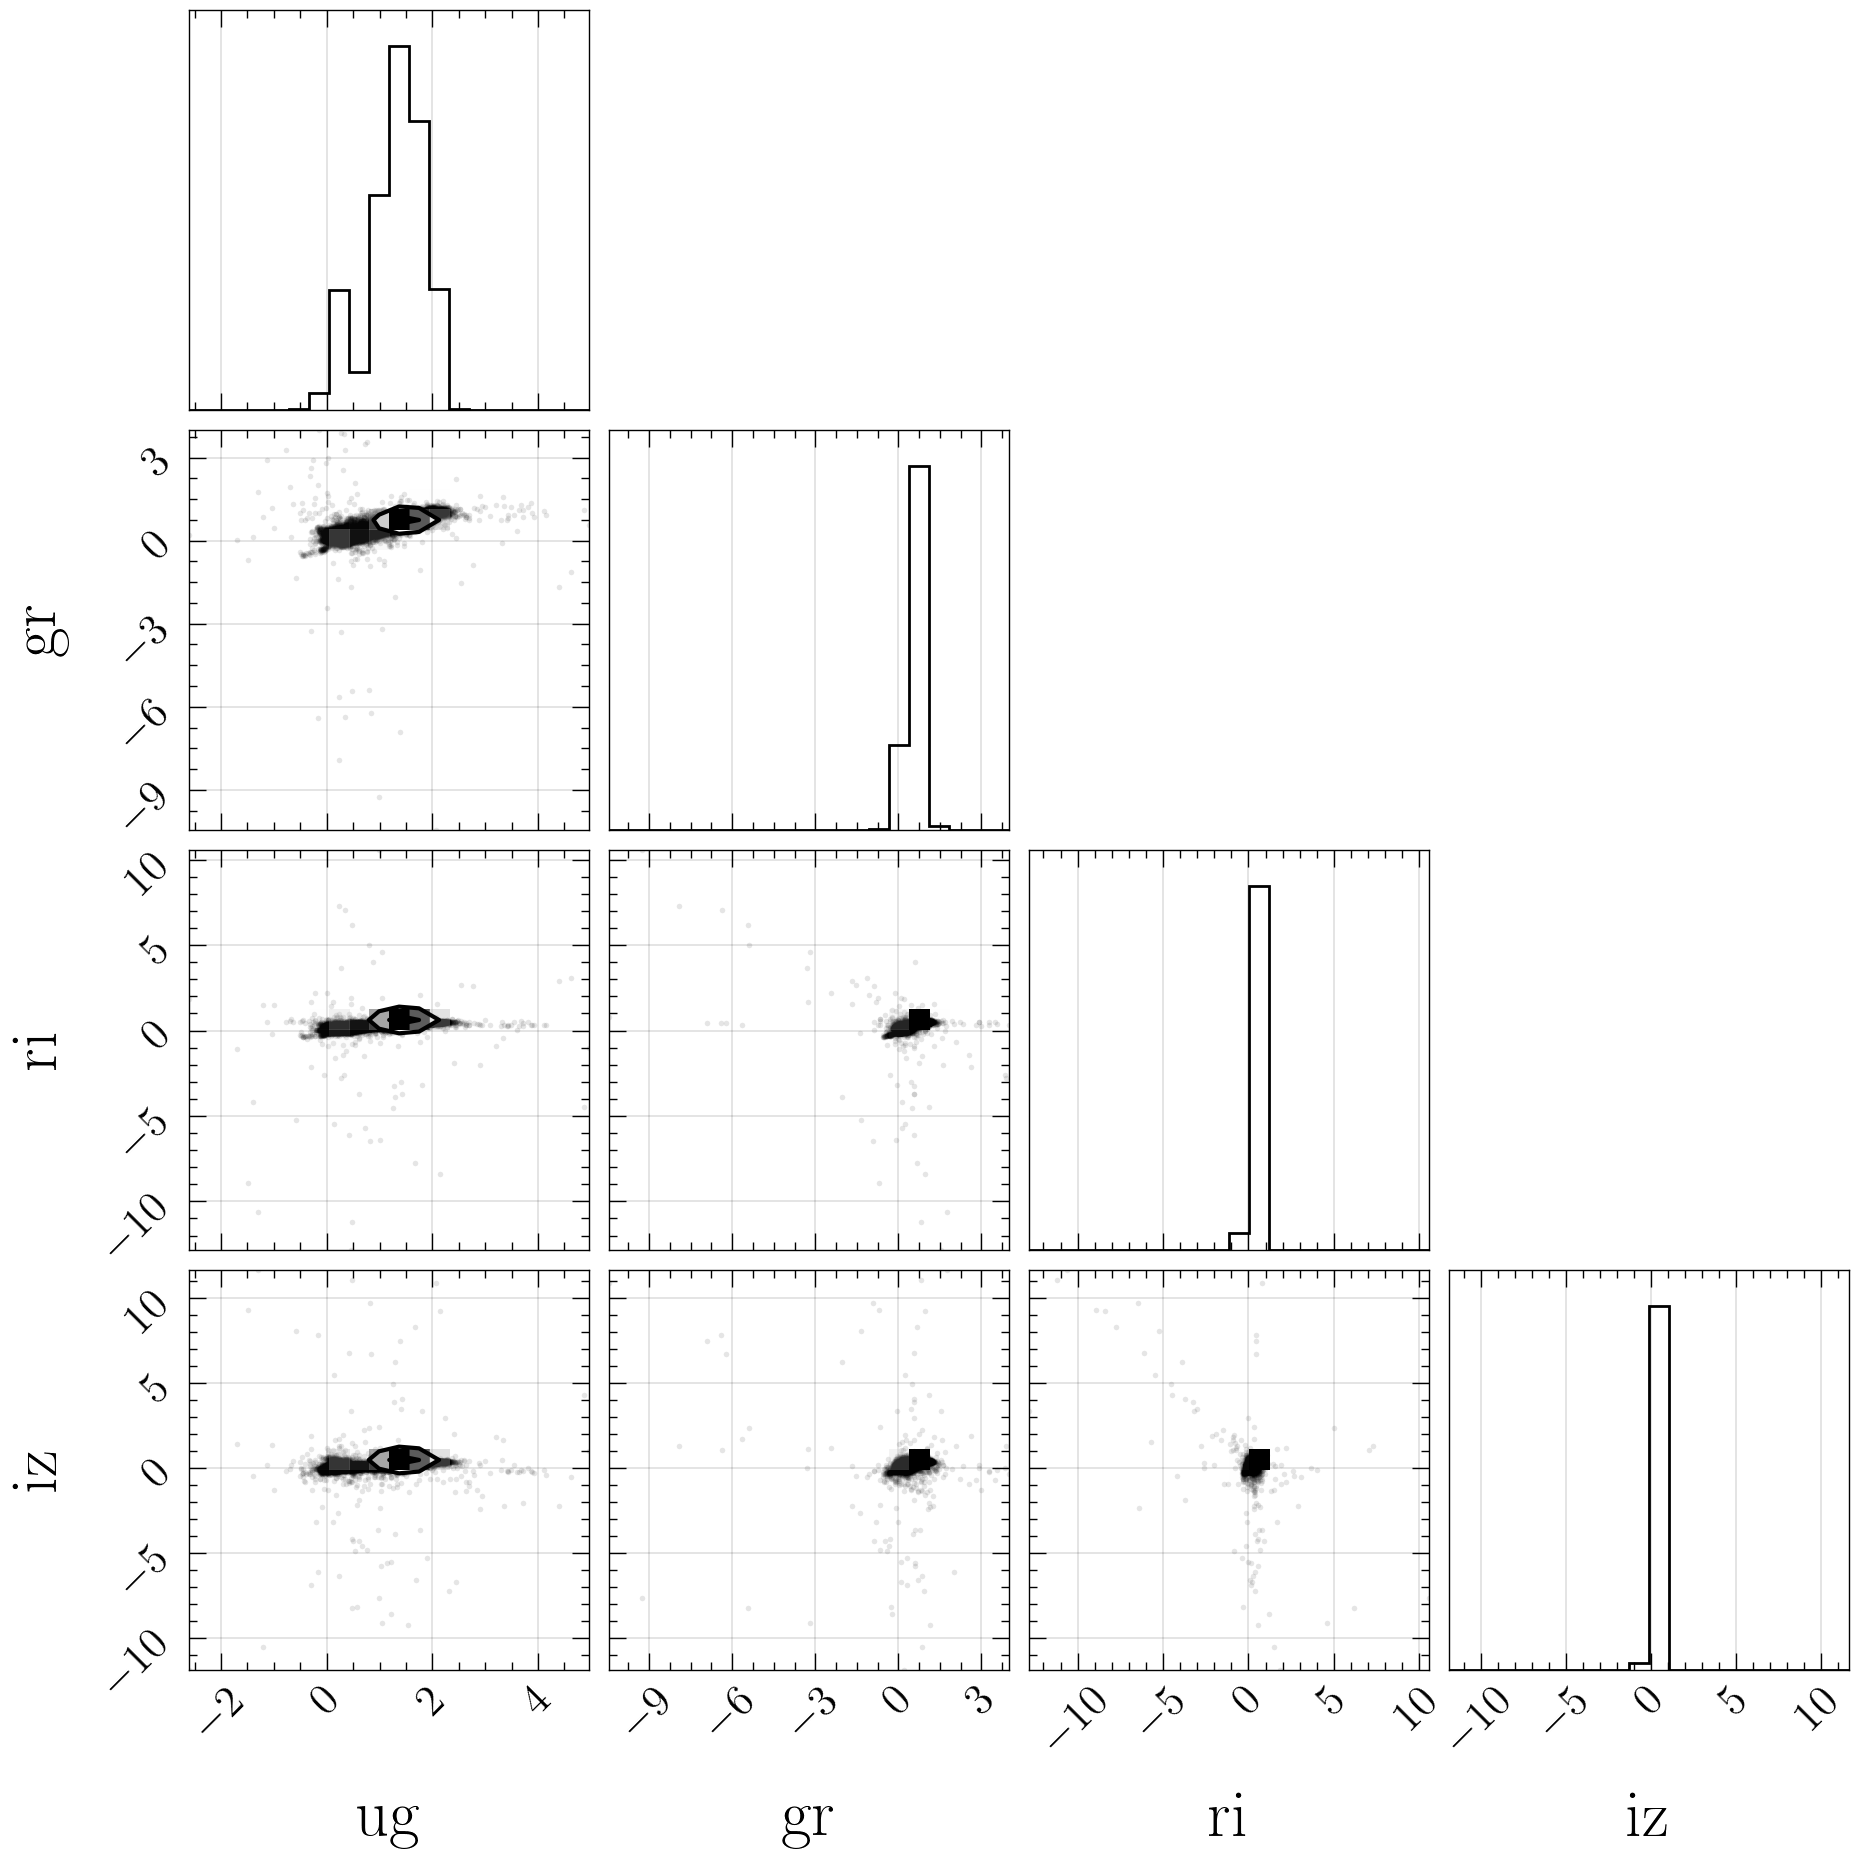

In [8]:
import corner

corner.corner(np.array([data['ug'], data['gr'], data['ri'], data['iz']]).T, labels=['ug', 'gr', 'ri', 'iz']);

## 3) Classification